In [9]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt 

In [12]:
captcha_length = 4
model_path = 'model/'
test_img_path = 'test/'
 
def get_image_data_and_name(fileName, filePath=test_img_path):
    pathName = os.path.join(filePath, fileName)
    img = Image.open(pathName)
    #转为灰度图
    img = img.convert("L")       
    image_array = np.array(img)    
    image_data = image_array.flatten()/255
    image_name = fileName[0:captcha_length]
    return image_data, image_name
 
def digitalStr2Array(digitalStr):
    digitalList = []
    for c in digitalStr:
        digitalList.append(ord(c) - ord('0'))
    return np.array(digitalList)
 
def model_test():
    nameList = []
    for pathName in os.listdir(test_img_path):
        nameList.append(pathName.split('/')[-1])
    totalNumber = len(nameList)
    #加载graph
    saver = tf.train.import_meta_graph(model_path+"crack_captcha.model-6300.meta")
    graph = tf.get_default_graph()
    #从graph取得 tensor，他们的name是在构建graph时定义的(查看上面第2步里的代码)
    input_holder = graph.get_tensor_by_name("data_input:0")
    keep_prob_holder = graph.get_tensor_by_name("keep-prob:0")
    predict_max_idx = graph.get_tensor_by_name("predict_max_idx:0")
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint(model_path))
        count = 0
        for fileName in nameList:
            img_data, img_name = get_image_data_and_name(fileName, test_img_path)
            predict = sess.run(predict_max_idx, feed_dict={input_holder:[img_data], keep_prob_holder : 1.0})            
            filePathName = test_img_path + fileName
            print(filePathName)
            img = Image.open(filePathName)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            predictValue = np.squeeze(predict)
            rightValue = digitalStr2Array(img_name)
            if np.array_equal(predictValue, rightValue):
                result = 'Correct'
                count += 1
            else: 
                result = 'Wrong'            
            print('True value：{}， Predict value：{}，Result value：{}'.format(rightValue, predictValue, result))
            print('\n')
            
        print('Accuracy：%.2f%%(%d/%d)' % (count*100/totalNumber, count, totalNumber))

    

INFO:tensorflow:Restoring parameters from model/crack_captcha.model-6300
test/0029.png


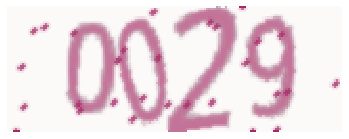

True value：[0 0 2 9]， Predict value：[4 8 5 7]，Result value：Wrong


test/0130.png


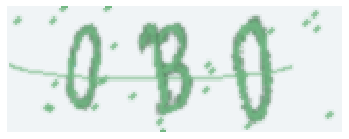

True value：[0 1 3 0]， Predict value：[4 8 5 7]，Result value：Wrong


test/0237.png


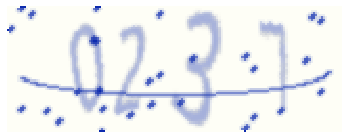

True value：[0 2 3 7]， Predict value：[4 8 9 7]，Result value：Wrong


test/0343.png


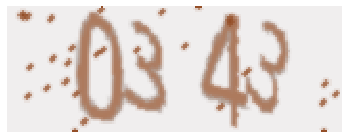

True value：[0 3 4 3]， Predict value：[4 8 5 7]，Result value：Wrong


test/0509.png


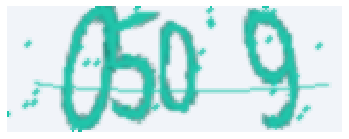

True value：[0 5 0 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/0511.png


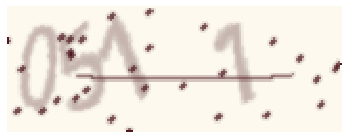

True value：[0 5 1 1]， Predict value：[4 8 5 7]，Result value：Wrong


test/0549.png


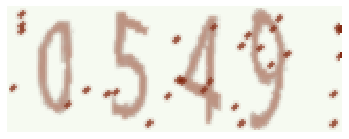

True value：[0 5 4 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/0599.png


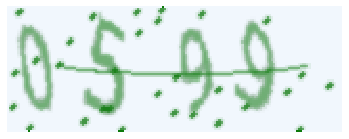

True value：[0 5 9 9]， Predict value：[4 8 7 7]，Result value：Wrong


test/0609.png


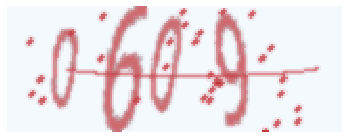

True value：[0 6 0 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/0616.png


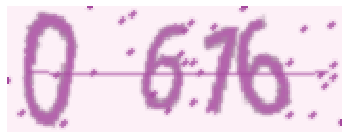

True value：[0 6 1 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/0618.png


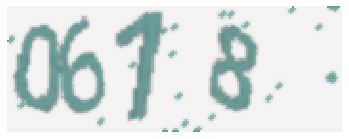

True value：[0 6 1 8]， Predict value：[1 8 9 7]，Result value：Wrong


test/0621.png


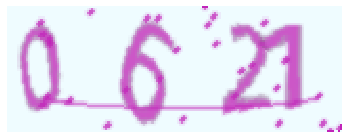

True value：[0 6 2 1]， Predict value：[6 8 9 0]，Result value：Wrong


test/0671.png


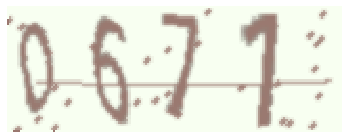

True value：[0 6 7 1]， Predict value：[4 8 9 7]，Result value：Wrong


test/0781.png


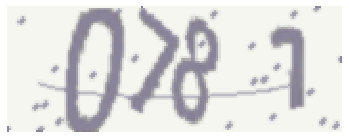

True value：[0 7 8 1]， Predict value：[6 8 9 4]，Result value：Wrong


test/0862.png


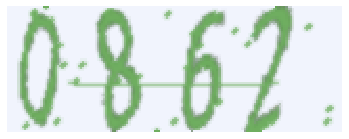

True value：[0 8 6 2]， Predict value：[4 8 2 7]，Result value：Wrong


test/1055.png


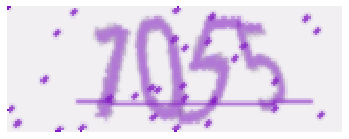

True value：[1 0 5 5]， Predict value：[4 8 5 7]，Result value：Wrong


test/1058.png


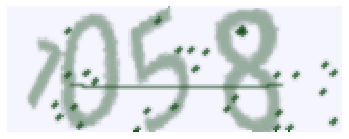

True value：[1 0 5 8]， Predict value：[6 8 5 7]，Result value：Wrong


test/1098.png


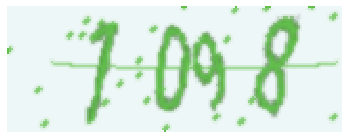

True value：[1 0 9 8]， Predict value：[4 8 9 7]，Result value：Wrong


test/1099.png


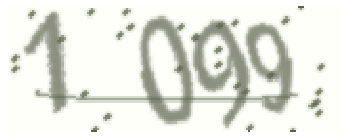

True value：[1 0 9 9]， Predict value：[6 8 9 7]，Result value：Wrong


test/1146.png


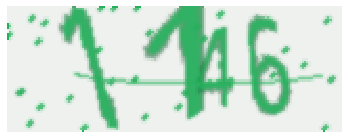

True value：[1 1 4 6]， Predict value：[6 8 2 7]，Result value：Wrong


test/1147.png


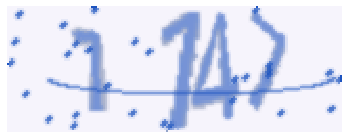

True value：[1 1 4 7]， Predict value：[6 8 5 7]，Result value：Wrong


test/1172.png


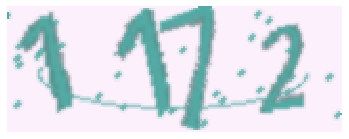

True value：[1 1 7 2]， Predict value：[6 8 9 7]，Result value：Wrong


test/1180.png


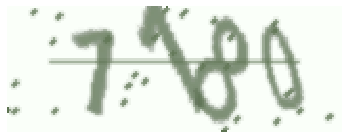

True value：[1 1 8 0]， Predict value：[4 8 5 7]，Result value：Wrong


test/1286.png


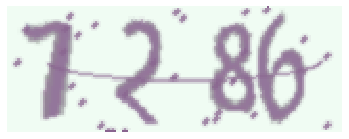

True value：[1 2 8 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/1408.png


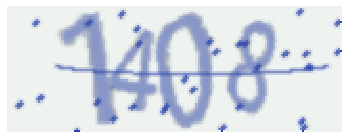

True value：[1 4 0 8]， Predict value：[6 8 5 7]，Result value：Wrong


test/1410.png


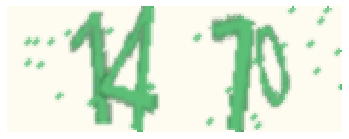

True value：[1 4 1 0]， Predict value：[4 8 9 7]，Result value：Wrong


test/1462.png


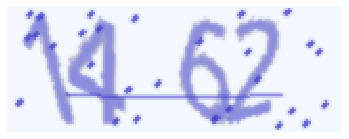

True value：[1 4 6 2]， Predict value：[4 8 2 7]，Result value：Wrong


test/1597.png


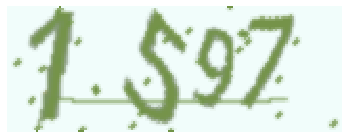

True value：[1 5 9 7]， Predict value：[6 8 9 7]，Result value：Wrong


test/1605.png


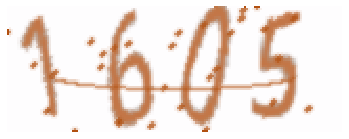

True value：[1 6 0 5]， Predict value：[4 8 5 7]，Result value：Wrong


test/1683.png


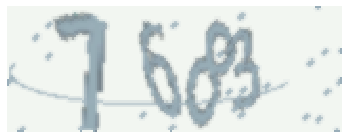

True value：[1 6 8 3]， Predict value：[6 8 9 7]，Result value：Wrong


test/1700.png


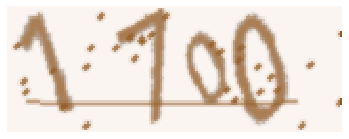

True value：[1 7 0 0]， Predict value：[4 8 9 7]，Result value：Wrong


test/1739.png


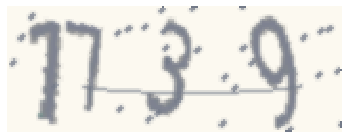

True value：[1 7 3 9]， Predict value：[6 8 9 7]，Result value：Wrong


test/1773.png


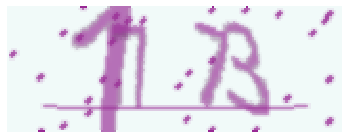

True value：[1 7 7 3]， Predict value：[4 8 2 7]，Result value：Wrong


test/1787.png


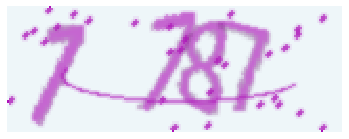

True value：[1 7 8 7]， Predict value：[4 8 5 7]，Result value：Wrong


test/1861.png


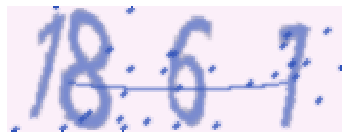

True value：[1 8 6 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/1965.png


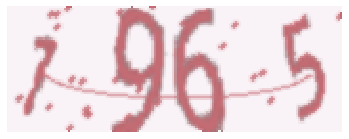

True value：[1 9 6 5]， Predict value：[6 8 5 7]，Result value：Wrong


test/1986.png


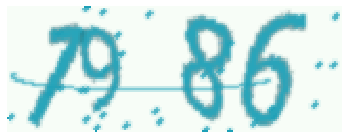

True value：[1 9 8 6]， Predict value：[4 8 9 7]，Result value：Wrong


test/1988.png


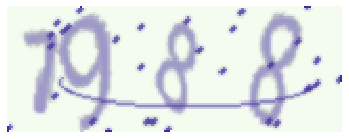

True value：[1 9 8 8]， Predict value：[4 8 9 7]，Result value：Wrong


test/2042.png


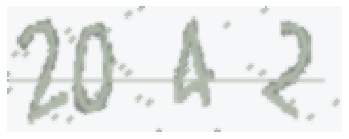

True value：[2 0 4 2]， Predict value：[6 8 9 7]，Result value：Wrong


test/2050.png


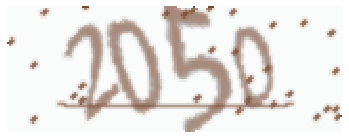

True value：[2 0 5 0]， Predict value：[4 8 5 7]，Result value：Wrong


test/2087.png


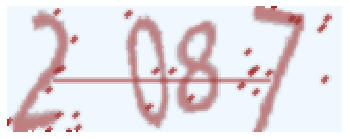

True value：[2 0 8 7]， Predict value：[6 8 9 7]，Result value：Wrong


test/2153.png


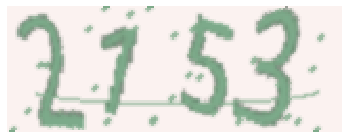

True value：[2 1 5 3]， Predict value：[6 8 9 7]，Result value：Wrong


test/2283.png


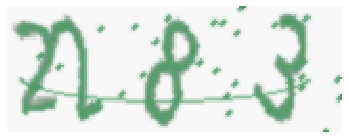

True value：[2 2 8 3]， Predict value：[4 8 5 7]，Result value：Wrong


test/2315.png


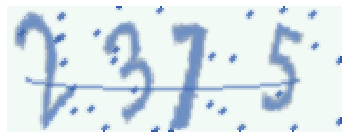

True value：[2 3 1 5]， Predict value：[4 8 9 7]，Result value：Wrong


test/2356.png


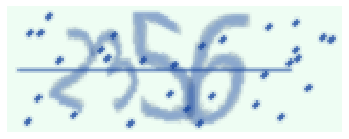

True value：[2 3 5 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/2368.png


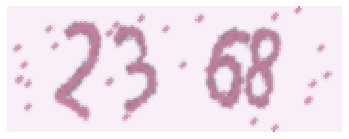

True value：[2 3 6 8]， Predict value：[6 8 5 7]，Result value：Wrong


test/2394.png


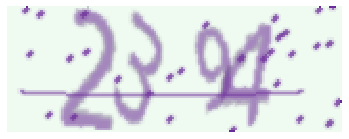

True value：[2 3 9 4]， Predict value：[6 8 5 7]，Result value：Wrong


test/2448.png


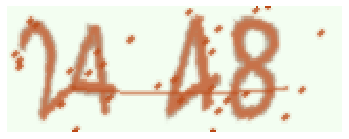

True value：[2 4 4 8]， Predict value：[4 8 2 7]，Result value：Wrong


test/2450.png


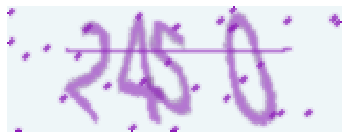

True value：[2 4 5 0]， Predict value：[4 8 9 7]，Result value：Wrong


test/2461.png


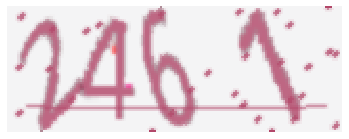

True value：[2 4 6 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/2546.png


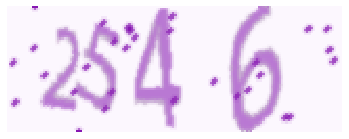

True value：[2 5 4 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/2689.png


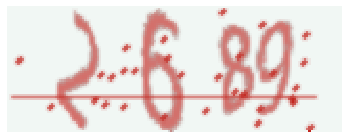

True value：[2 6 8 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/2729.png


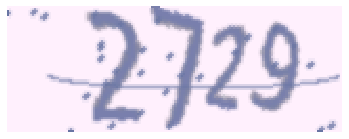

True value：[2 7 2 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/2741.png


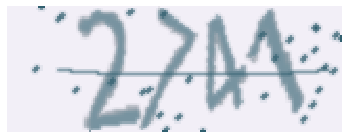

True value：[2 7 4 1]， Predict value：[4 8 5 7]，Result value：Wrong


test/2838.png


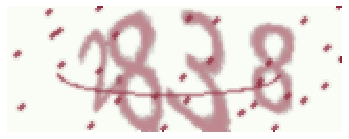

True value：[2 8 3 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/2846.png


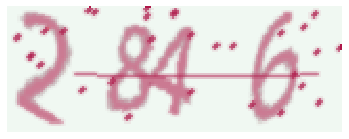

True value：[2 8 4 6]， Predict value：[6 8 9 7]，Result value：Wrong


test/2853.png


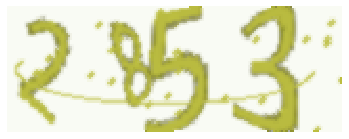

True value：[2 8 5 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/2923.png


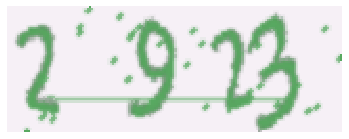

True value：[2 9 2 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/2942.png


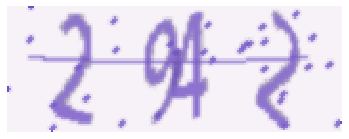

True value：[2 9 4 2]， Predict value：[6 8 5 7]，Result value：Wrong


test/2985.png


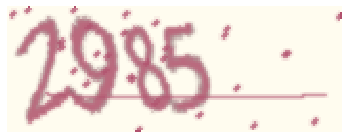

True value：[2 9 8 5]， Predict value：[4 8 5 7]，Result value：Wrong


test/2988.png


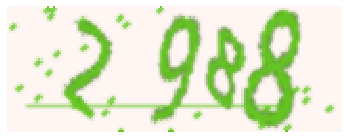

True value：[2 9 8 8]， Predict value：[6 8 9 7]，Result value：Wrong


test/3001.png


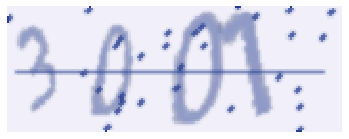

True value：[3 0 0 1]， Predict value：[4 8 9 7]，Result value：Wrong


test/3006.png


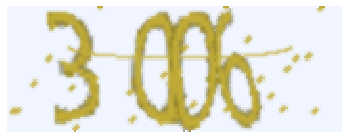

True value：[3 0 0 6]， Predict value：[4 8 2 7]，Result value：Wrong


test/3061.png


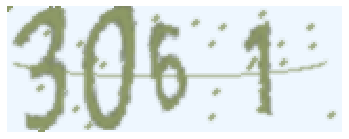

True value：[3 0 6 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/3110.png


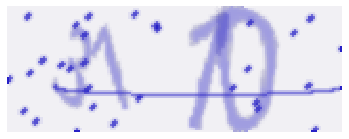

True value：[3 1 1 0]， Predict value：[6 8 5 7]，Result value：Wrong


test/3192.png


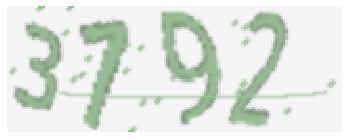

True value：[3 1 9 2]， Predict value：[6 8 2 7]，Result value：Wrong


test/3348.png


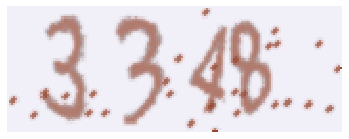

True value：[3 3 4 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/3356.png


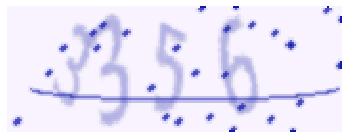

True value：[3 3 5 6]， Predict value：[4 8 7 7]，Result value：Wrong


test/3381.png


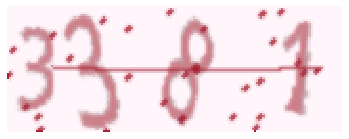

True value：[3 3 8 1]， Predict value：[6 8 5 4]，Result value：Wrong


test/3460.png


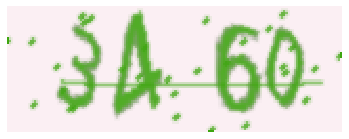

True value：[3 4 6 0]， Predict value：[6 8 9 7]，Result value：Wrong


test/3478.png


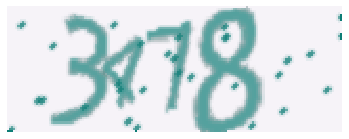

True value：[3 4 7 8]， Predict value：[4 8 2 7]，Result value：Wrong


test/3581.png


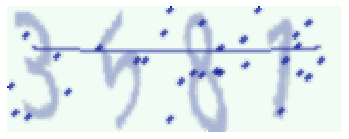

True value：[3 5 8 1]， Predict value：[4 8 9 7]，Result value：Wrong


test/3589.png


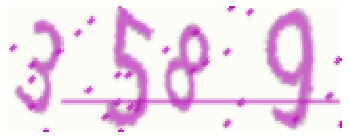

True value：[3 5 8 9]， Predict value：[6 8 9 7]，Result value：Wrong


test/3630.png


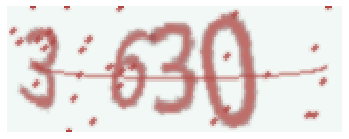

True value：[3 6 3 0]， Predict value：[6 8 2 7]，Result value：Wrong


test/3641.png


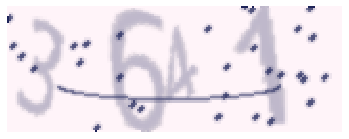

True value：[3 6 4 1]， Predict value：[6 8 9 7]，Result value：Wrong


test/3677.png


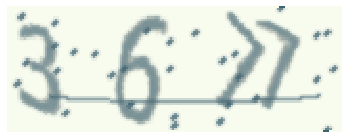

True value：[3 6 7 7]， Predict value：[6 8 9 7]，Result value：Wrong


test/3684.png


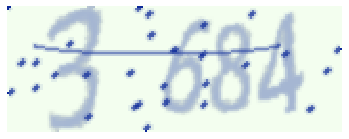

True value：[3 6 8 4]， Predict value：[4 8 5 7]，Result value：Wrong


test/3692.png


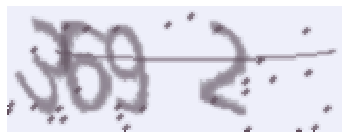

True value：[3 6 9 2]， Predict value：[4 8 5 7]，Result value：Wrong


test/3781.png


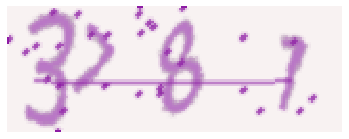

True value：[3 7 8 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/3783.png


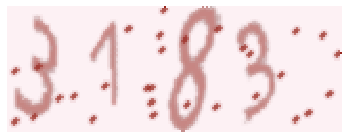

True value：[3 7 8 3]， Predict value：[4 8 5 7]，Result value：Wrong


test/4037.png


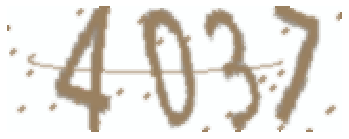

True value：[4 0 3 7]， Predict value：[4 8 5 7]，Result value：Wrong


test/4080.png


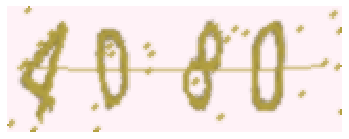

True value：[4 0 8 0]， Predict value：[4 8 2 7]，Result value：Wrong


test/4147.png


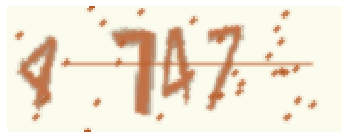

True value：[4 1 4 7]， Predict value：[6 8 5 7]，Result value：Wrong


test/4272.png


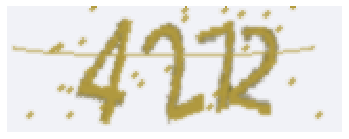

True value：[4 2 7 2]， Predict value：[6 8 9 7]，Result value：Wrong


test/4273.png


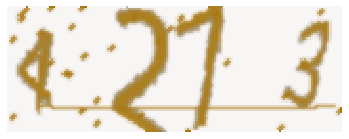

True value：[4 2 7 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/4323.png


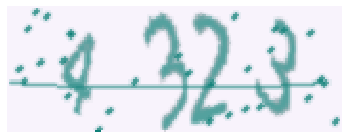

True value：[4 3 2 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/4335.png


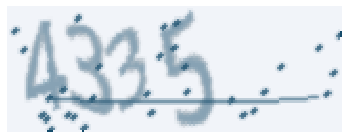

True value：[4 3 3 5]， Predict value：[4 8 7 7]，Result value：Wrong


test/4412.png


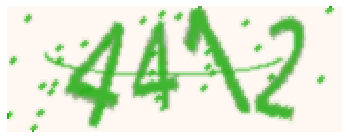

True value：[4 4 1 2]， Predict value：[4 8 9 7]，Result value：Wrong


test/4478.png


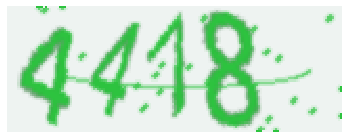

True value：[4 4 7 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/4490.png


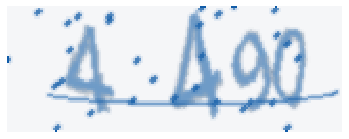

True value：[4 4 9 0]， Predict value：[6 8 9 7]，Result value：Wrong


test/4555.png


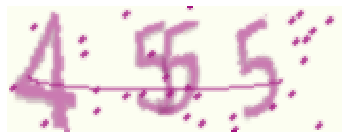

True value：[4 5 5 5]， Predict value：[6 8 5 7]，Result value：Wrong


test/4580.png


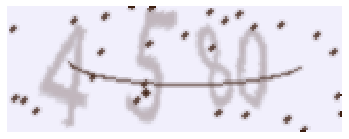

True value：[4 5 8 0]， Predict value：[6 8 9 7]，Result value：Wrong


test/4587.png


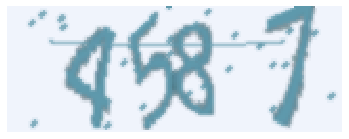

True value：[4 5 8 7]， Predict value：[6 8 1 7]，Result value：Wrong


test/4591.png


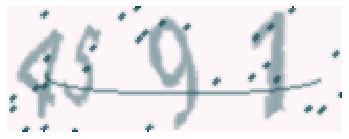

True value：[4 5 9 1]， Predict value：[4 8 5 7]，Result value：Wrong


test/4667.png


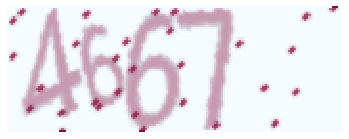

True value：[4 6 6 7]， Predict value：[6 8 9 7]，Result value：Wrong


test/4738.png


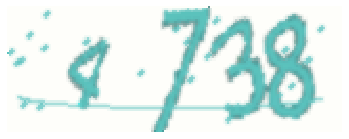

True value：[4 7 3 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/4817.png


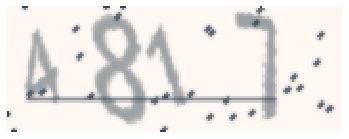

True value：[4 8 1 7]， Predict value：[4 8 9 7]，Result value：Wrong


test/4889.png


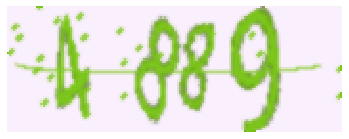

True value：[4 8 8 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/5051.png


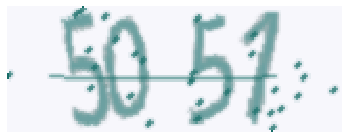

True value：[5 0 5 1]， Predict value：[4 8 9 7]，Result value：Wrong


test/5176.png


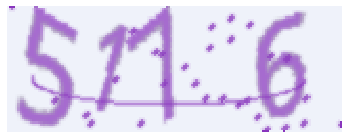

True value：[5 1 7 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/5192.png


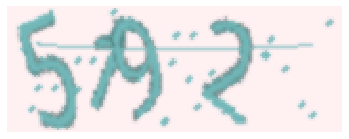

True value：[5 1 9 2]， Predict value：[1 8 2 7]，Result value：Wrong


test/5199.png


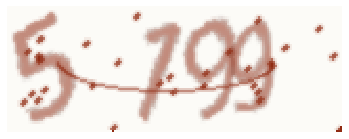

True value：[5 1 9 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/5325.png


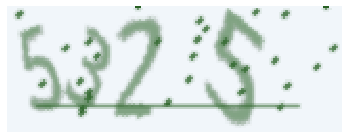

True value：[5 3 2 5]， Predict value：[6 8 9 7]，Result value：Wrong


test/5355.png


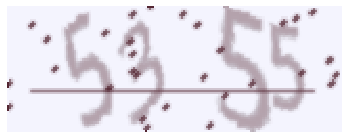

True value：[5 3 5 5]， Predict value：[6 8 5 7]，Result value：Wrong


test/5357.png


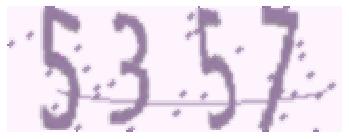

True value：[5 3 5 7]， Predict value：[4 8 2 7]，Result value：Wrong


test/5484.png


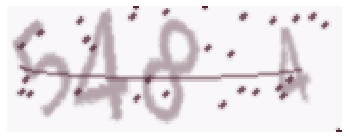

True value：[5 4 8 4]， Predict value：[4 8 9 7]，Result value：Wrong


test/5561.png


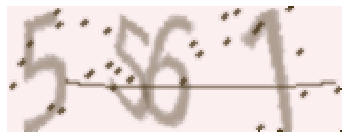

True value：[5 5 6 1]， Predict value：[6 8 9 7]，Result value：Wrong


test/5582.png


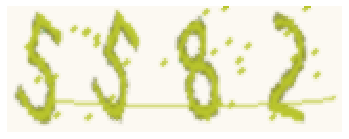

True value：[5 5 8 2]， Predict value：[6 8 9 7]，Result value：Wrong


test/5590.png


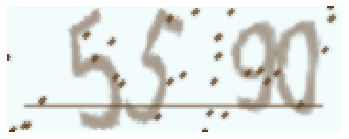

True value：[5 5 9 0]， Predict value：[4 8 5 7]，Result value：Wrong


test/5648.png


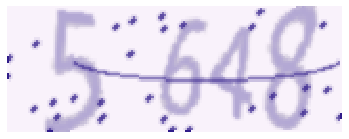

True value：[5 6 4 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/5710.png


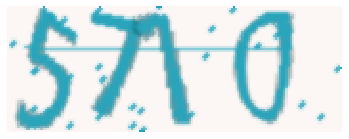

True value：[5 7 1 0]， Predict value：[6 8 9 7]，Result value：Wrong


test/5711.png


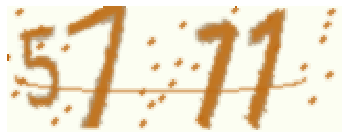

True value：[5 7 1 1]， Predict value：[4 8 5 7]，Result value：Wrong


test/5813.png


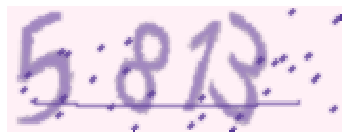

True value：[5 8 1 3]， Predict value：[6 8 9 7]，Result value：Wrong


test/5819.png


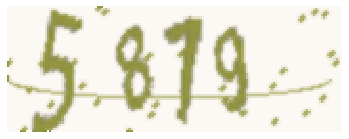

True value：[5 8 1 9]， Predict value：[6 8 9 7]，Result value：Wrong


test/5827.png


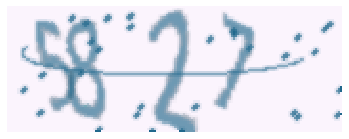

True value：[5 8 2 7]， Predict value：[6 8 5 7]，Result value：Wrong


test/5868.png


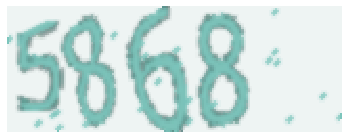

True value：[5 8 6 8]， Predict value：[4 8 2 7]，Result value：Wrong


test/6017.png


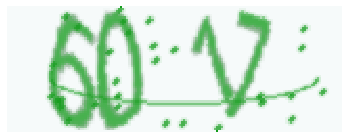

True value：[6 0 1 7]， Predict value：[4 8 5 7]，Result value：Wrong


test/6137.png


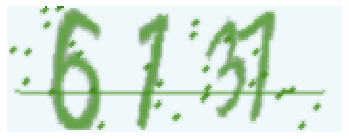

True value：[6 1 3 7]， Predict value：[4 8 9 7]，Result value：Wrong


test/6299.png


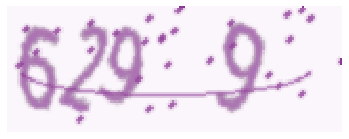

True value：[6 2 9 9]， Predict value：[4 8 5 7]，Result value：Wrong


test/6423.png


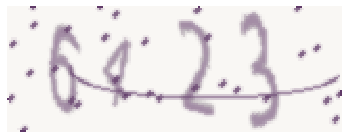

True value：[6 4 2 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/6448.png


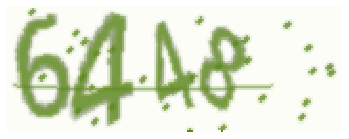

True value：[6 4 4 8]， Predict value：[4 8 9 7]，Result value：Wrong


test/6538.png


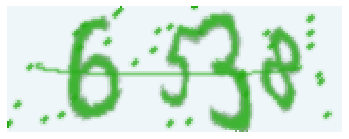

True value：[6 5 3 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/6754.png


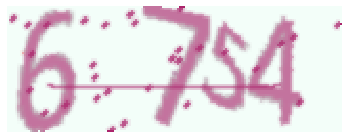

True value：[6 7 5 4]， Predict value：[6 8 9 7]，Result value：Wrong


test/6830.png


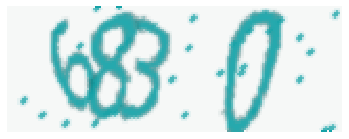

True value：[6 8 3 0]， Predict value：[4 8 5 7]，Result value：Wrong


test/6839.png


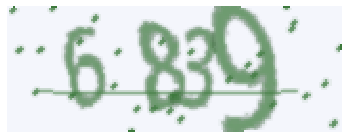

True value：[6 8 3 9]， Predict value：[4 8 5 7]，Result value：Wrong


test/6938.png


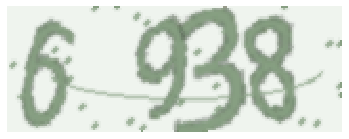

True value：[6 9 3 8]， Predict value：[6 3 5 7]，Result value：Wrong


test/6950.png


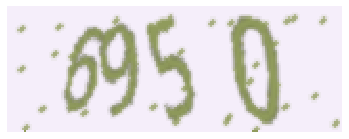

True value：[6 9 5 0]， Predict value：[4 8 2 7]，Result value：Wrong


test/7011.png


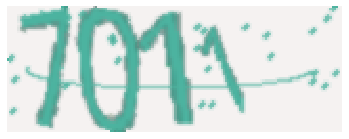

True value：[7 0 1 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/7073.png


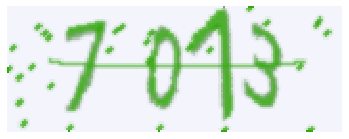

True value：[7 0 7 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/7080.png


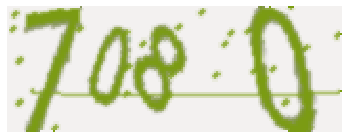

True value：[7 0 8 0]， Predict value：[6 8 5 7]，Result value：Wrong


test/7136.png


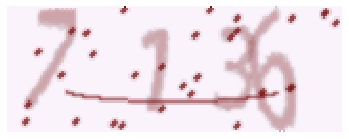

True value：[7 1 3 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/7164.png


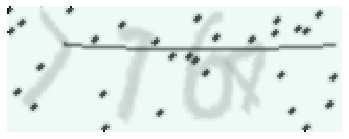

True value：[7 1 6 4]， Predict value：[4 8 5 7]，Result value：Wrong


test/7166.png


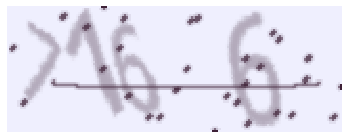

True value：[7 1 6 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/7176.png


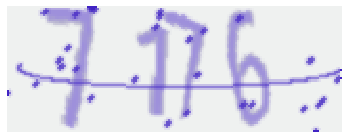

True value：[7 1 7 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/7219.png


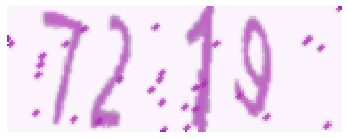

True value：[7 2 1 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/7324.png


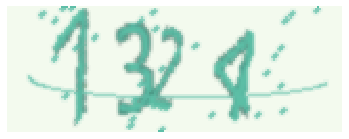

True value：[7 3 2 4]， Predict value：[6 8 9 7]，Result value：Wrong


test/7332.png


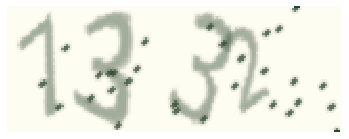

True value：[7 3 3 2]， Predict value：[4 8 5 7]，Result value：Wrong


test/7347.png


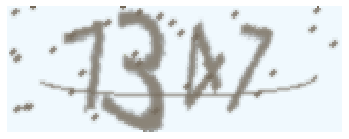

True value：[7 3 4 7]， Predict value：[4 8 5 7]，Result value：Wrong


test/7350.png


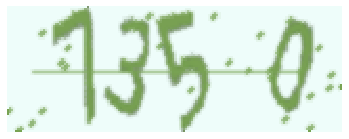

True value：[7 3 5 0]， Predict value：[6 8 5 7]，Result value：Wrong


test/7366.png


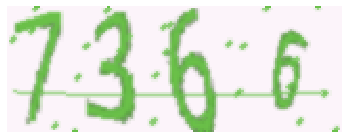

True value：[7 3 6 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/7395.png


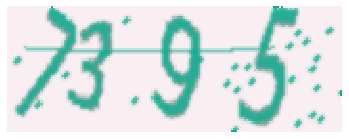

True value：[7 3 9 5]， Predict value：[6 8 5 7]，Result value：Wrong


test/7477.png


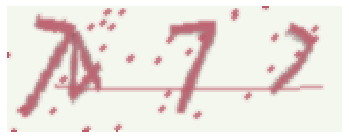

True value：[7 4 7 7]， Predict value：[6 8 5 7]，Result value：Wrong


test/7561.png


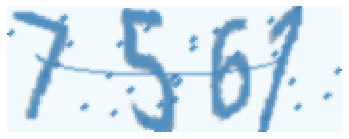

True value：[7 5 6 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/7573.png


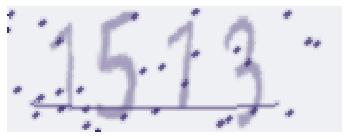

True value：[7 5 7 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/7585.png


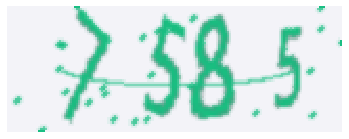

True value：[7 5 8 5]， Predict value：[6 8 5 7]，Result value：Wrong


test/7617.png


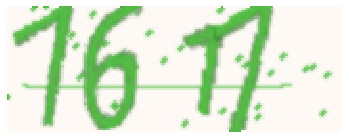

True value：[7 6 1 7]， Predict value：[6 8 5 7]，Result value：Wrong


test/7618.png


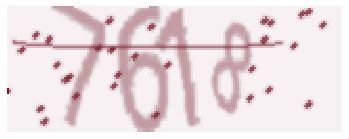

True value：[7 6 1 8]， Predict value：[6 8 5 7]，Result value：Wrong


test/7628.png


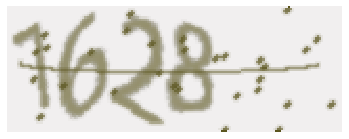

True value：[7 6 2 8]， Predict value：[6 8 5 7]，Result value：Wrong


test/7671.png


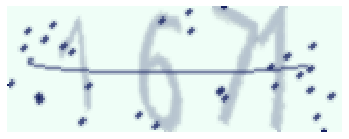

True value：[7 6 7 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/7673.png


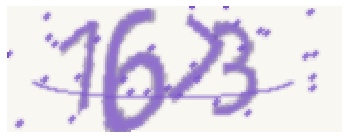

True value：[7 6 7 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/7689.png


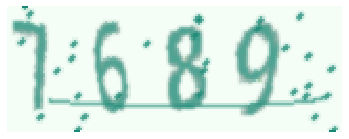

True value：[7 6 8 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/7700.png


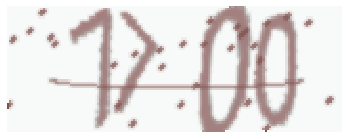

True value：[7 7 0 0]， Predict value：[4 8 5 7]，Result value：Wrong


test/7737.png


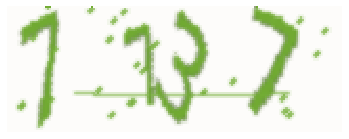

True value：[7 7 3 7]， Predict value：[6 8 9 7]，Result value：Wrong


test/7782.png


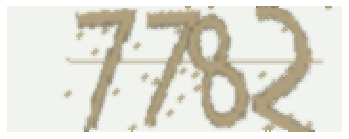

True value：[7 7 8 2]， Predict value：[4 2 9 7]，Result value：Wrong


test/7809.png


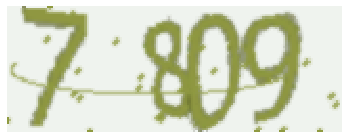

True value：[7 8 0 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/7879.png


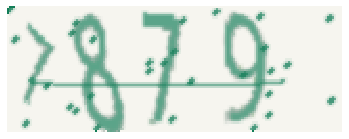

True value：[7 8 7 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/7934.png


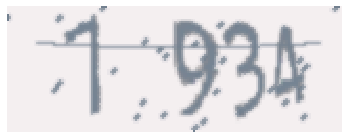

True value：[7 9 3 4]， Predict value：[4 8 9 7]，Result value：Wrong


test/7956.png


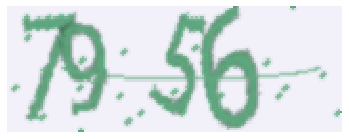

True value：[7 9 5 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/7986.png


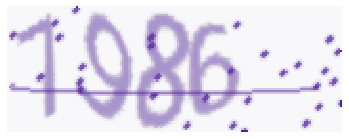

True value：[7 9 8 6]， Predict value：[6 8 7 7]，Result value：Wrong


test/8034.png


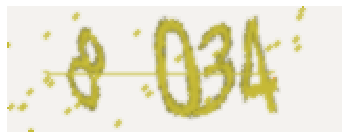

True value：[8 0 3 4]， Predict value：[4 8 5 7]，Result value：Wrong


test/8037.png


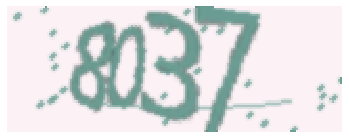

True value：[8 0 3 7]， Predict value：[4 8 5 7]，Result value：Wrong


test/8039.png


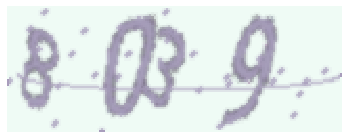

True value：[8 0 3 9]， Predict value：[6 8 2 7]，Result value：Wrong


test/8047.png


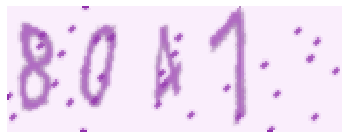

True value：[8 0 4 7]， Predict value：[4 8 9 4]，Result value：Wrong


test/8073.png


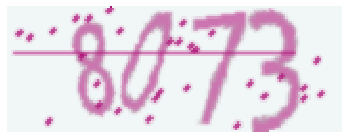

True value：[8 0 7 3]， Predict value：[4 8 5 7]，Result value：Wrong


test/8106.png


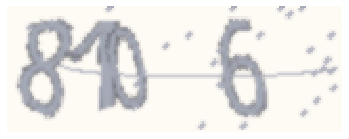

True value：[8 1 0 6]， Predict value：[4 8 9 7]，Result value：Wrong


test/8216.png


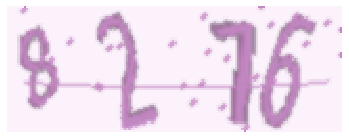

True value：[8 2 1 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/8248.png


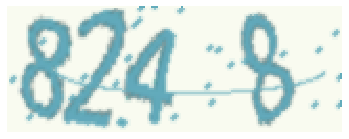

True value：[8 2 4 8]， Predict value：[4 8 5 7]，Result value：Wrong


test/8276.png


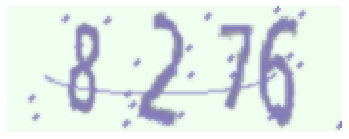

True value：[8 2 7 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/8316.png


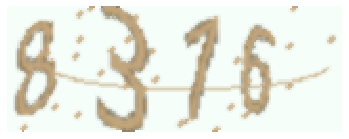

True value：[8 3 1 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/8362.png


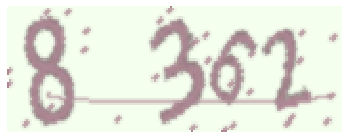

True value：[8 3 6 2]， Predict value：[6 8 9 7]，Result value：Wrong


test/8370.png


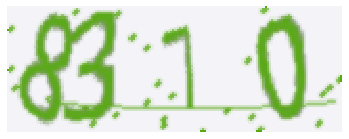

True value：[8 3 7 0]， Predict value：[4 8 7 4]，Result value：Wrong


test/8524.png


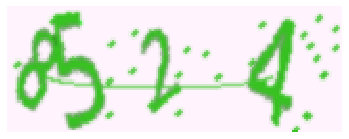

True value：[8 5 2 4]， Predict value：[1 8 9 7]，Result value：Wrong


test/8586.png


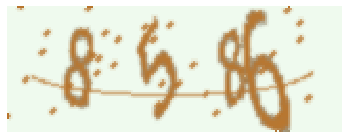

True value：[8 5 8 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/8660.png


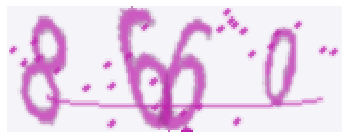

True value：[8 6 6 0]， Predict value：[6 8 5 7]，Result value：Wrong


test/8663.png


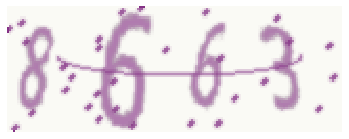

True value：[8 6 6 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/8773.png


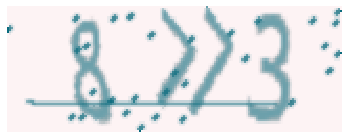

True value：[8 7 7 3]， Predict value：[4 8 9 7]，Result value：Wrong


test/8865.png


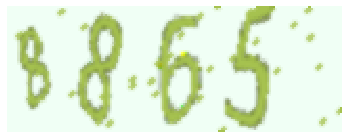

True value：[8 8 6 5]， Predict value：[4 8 5 7]，Result value：Wrong


test/8887.png


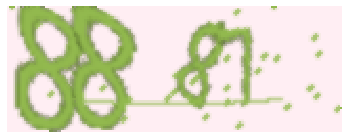

True value：[8 8 8 7]， Predict value：[4 8 2 7]，Result value：Wrong


test/8896.png


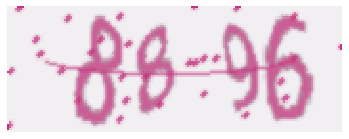

True value：[8 8 9 6]， Predict value：[4 8 7 7]，Result value：Wrong


test/9040.png


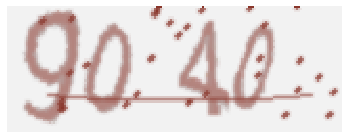

True value：[9 0 4 0]， Predict value：[4 8 9 7]，Result value：Wrong


test/9071.png


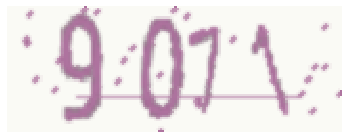

True value：[9 0 7 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/9105.png


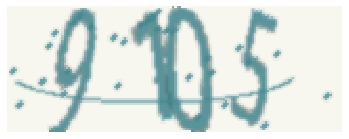

True value：[9 1 0 5]， Predict value：[4 8 5 7]，Result value：Wrong


test/9152.png


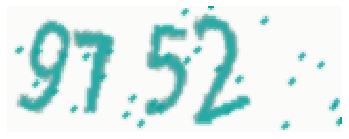

True value：[9 1 5 2]， Predict value：[6 8 9 7]，Result value：Wrong


test/9159.png


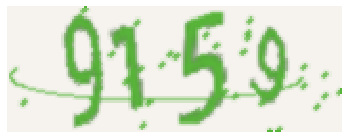

True value：[9 1 5 9]， Predict value：[6 8 5 7]，Result value：Wrong


test/9181.png


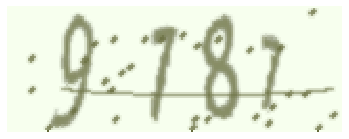

True value：[9 1 8 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/9235.png


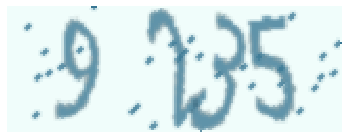

True value：[9 2 3 5]， Predict value：[6 8 5 7]，Result value：Wrong


test/9236.png


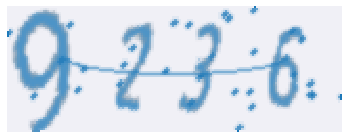

True value：[9 2 3 6]， Predict value：[6 8 5 7]，Result value：Wrong


test/9305.png


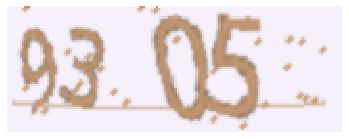

True value：[9 3 0 5]， Predict value：[1 8 5 7]，Result value：Wrong


test/9480.png


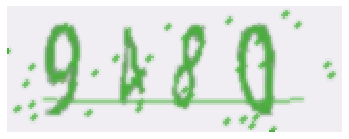

True value：[9 4 8 0]， Predict value：[6 8 5 7]，Result value：Wrong


test/9513.png


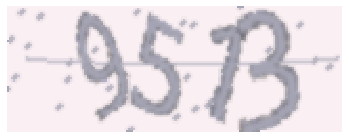

True value：[9 5 1 3]， Predict value：[6 8 5 7]，Result value：Wrong


test/9556.png


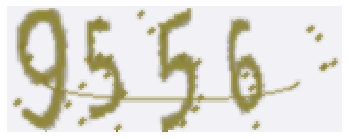

True value：[9 5 5 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/9778.png


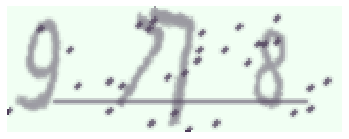

True value：[9 7 7 8]， Predict value：[6 8 5 7]，Result value：Wrong


test/9796.png


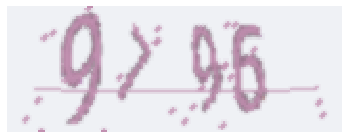

True value：[9 7 9 6]， Predict value：[4 8 5 7]，Result value：Wrong


test/9873.png


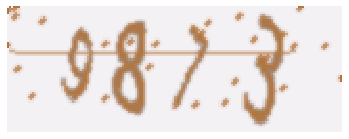

True value：[9 8 7 3]， Predict value：[4 8 9 7]，Result value：Wrong


test/9934.png


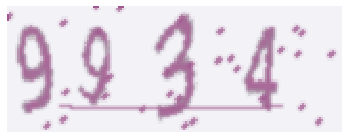

True value：[9 9 3 4]， Predict value：[4 8 5 7]，Result value：Wrong


test/9951.png


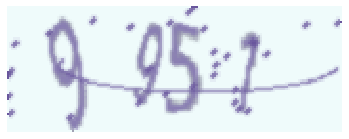

True value：[9 9 5 1]， Predict value：[6 8 5 7]，Result value：Wrong


test/9964.png


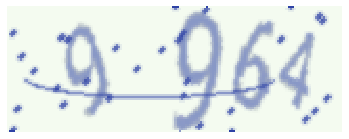

True value：[9 9 6 4]， Predict value：[6 8 5 7]，Result value：Wrong


test/9976.png


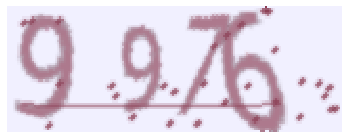

True value：[9 9 7 6]， Predict value：[6 8 5 7]，Result value：Wrong


Accuracy：0.00%(0/198)


In [13]:
tf.reset_default_graph()
model_test()